reading 85b57c6414e4b85a49df0eb9a2921ee0 96.25
reading a4d4a3920138be102517593ba155f278 98.75
reading 17ff7959bf3d2a2013f9ab1eb34ae176 93.5
reading afd089b28293e9dc7e19a5a038d00c20 97.75
reading b581d76c101d918cafdd02ac5b98ac95 98.5
reading 2884d96a8cc8612a08b889106ad79558 80.25
reading 82e7761deaa9352c486465986f5f6535 93.5
reading 63f347804e9c801a656ad9b15aeab267 90.0
reading 70433d90871e41026785c63f77e4afef 97.75
reading 3a056824bea0ce74a37f34b82fb975ae 97.25
reading 87e506e29bff0f853e7ba0329caa2ec8 95.0
reading ea75d3699a28915287ad889fe27afcfb 97.75
reading 565bb39dfd1dbc33d61b7dc7eeee9f7a 97.25
reading 8e3c54cbd403a56af218fa734ad606f8 96.75
reading 4107ba6253bfa6629248490666858483 98.0
reading f9d19731409988f44c872db80bf5f2b0 95.0
reading abaadec57e0b1eccee52b9f068f266ae 87.0
reading 16b54b949262ef213be8b909c8e8921c 98.25
reading 2d0a132ff402c396e3c8597d5c4cbb8e 92.5
reading 514e034d0d4522e8152b44b611eaf060 93.0
reading c1d2271df797d7bda7583c309115a958 81.25
reading b4eae465ceadd61

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


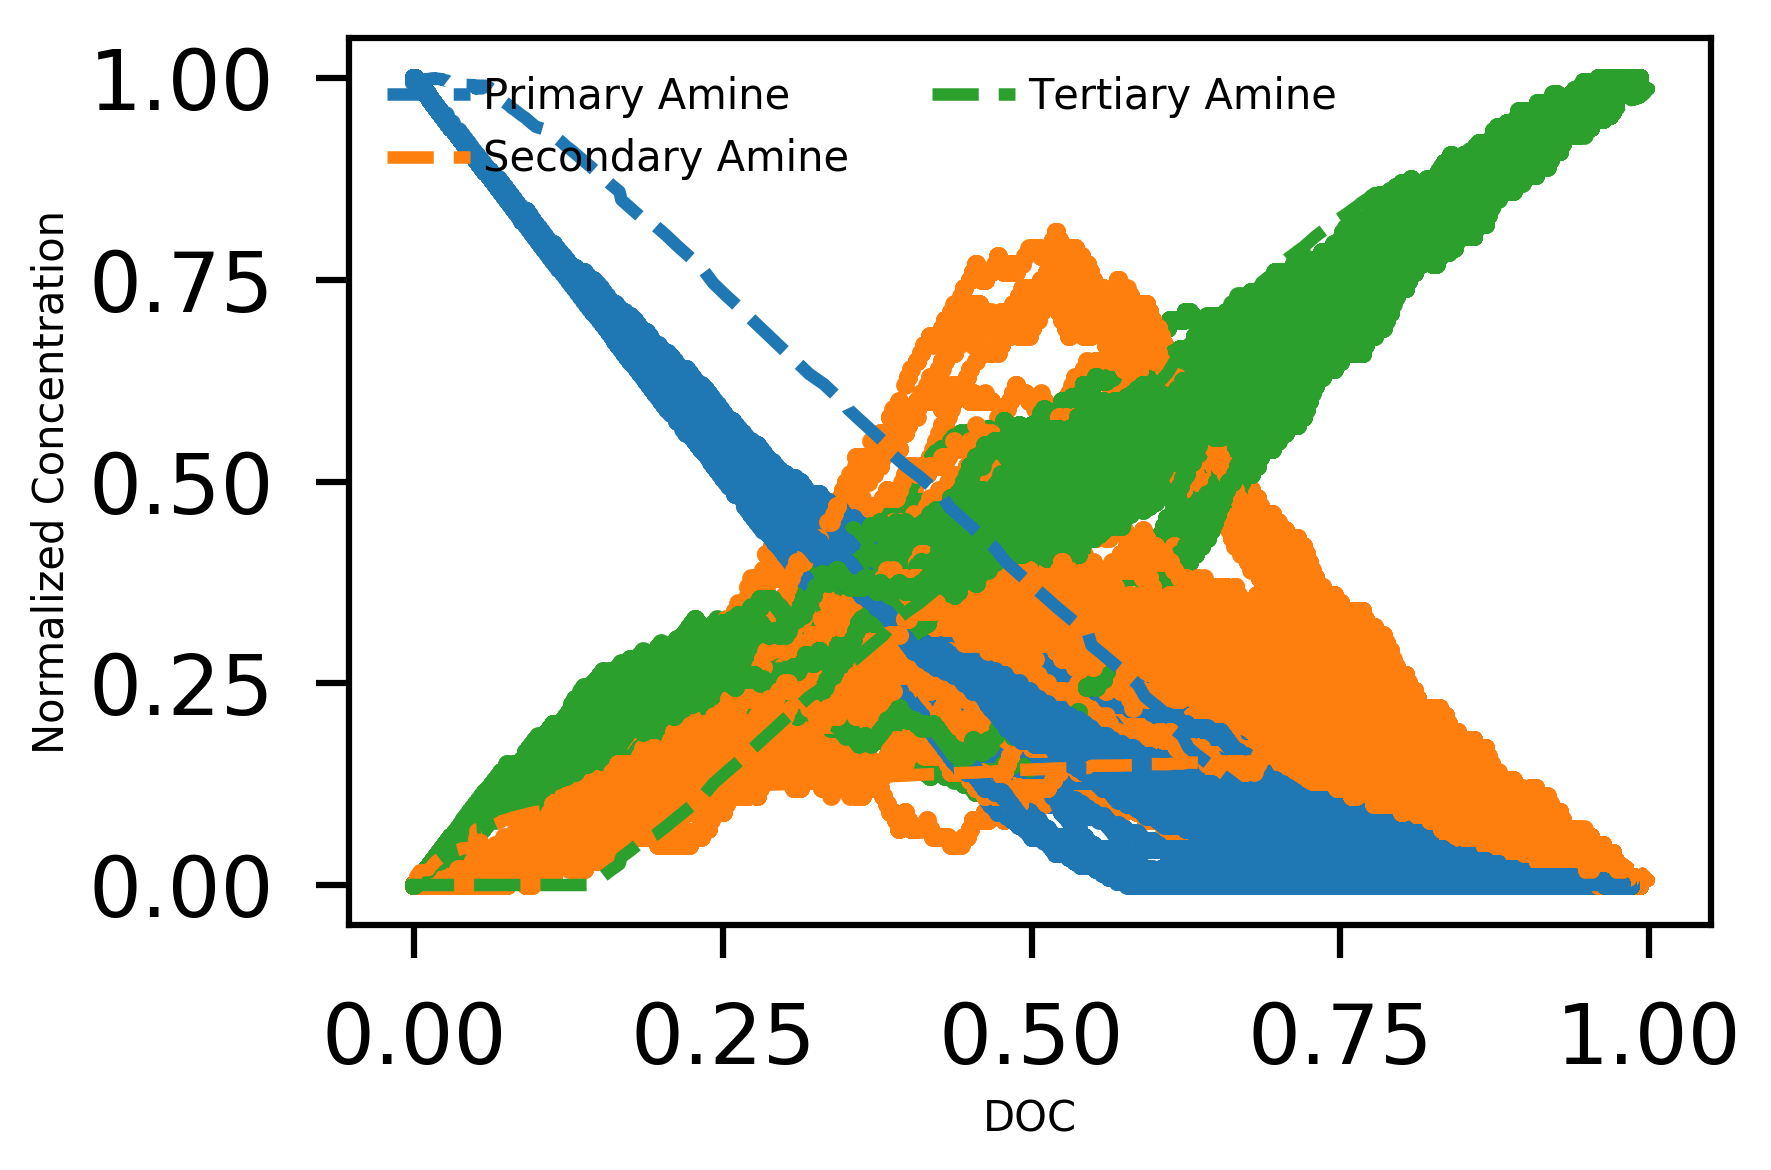

93bae8b65b158ca7903712e1906fa118


In [41]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline


#project = signac.get_project()
path = "/home/mikehenry/epoxy-stuff/doc_exp"
#path = "/home/mikehenry/epoxy-stuff/LB_mixing_post_process"
#project = signac.get_project("/home/mikehenry/epoxy-stuff/LB_mixing_post_process")
#jobs = project.find_jobs(doc_filter={
#    "$and":[
#        {"cure_percent":{"$gte":90},
#        "mike_A": {"$lt":2}}
#                                     ]})
#jobs = project.find_jobs(doc_filter={"mike_SP": True})
#jobs = project.find_jobs(doc_filter={"mike_A":1.0})

project = signac.get_project(path)

#project = project.find_jobs({"activation_energy":1.0})
jobs = project.find_jobs(filter={"$and":[{"activation_energy":3.0, "kT": 1.0}]}, doc_filter={"cure_percent":{"$gte":0}})
jobs = project.find_jobs(filter={'sec_bond_weight':1.2})
jobs = project.find_jobs(filter={"$and":[{"sec_bond_weight":100, "kT": 1.0,"activation_energy":3.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
jobs = project.find_jobs(filter={"$and":[{"kT": 3.5,"activation_energy":1.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":0}})
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})


#jobs = signac.get_project(path)

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))
for job in jobs:
    #if job.sp.activation_energy !=1.0:
    #    print("oops")
    #if job.doc.cure_percent < 90:
    #    print("oops")
    #print(job._id)
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
        print("reading", job._id, job.doc.cure_percent)
    except FileNotFoundError:
        #print("skipping")
        continue
    A = job.sp.percent_bonds_per_step/job.sp.bond_period
    job.doc.mike_A = A
    A = job.doc.mike_A
    df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    #primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    #secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    #ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    # this is the normal count:
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_two_bonds*2  
    ternaryA_cnts_R = 1 - (primaryA_cnts_R + secondaryA_cnts_R)
    #0/1/2/3/4 bonds =  2/1/0/0/0 primary amines
    #0/1/2/3/4 bonds =  0/1/2/1/0 secondary amines
    #0/1/2/3/4 bonds =  0/0/0/1/2 tertiary amines
    #but I do not know if there would be any way to tell if a bead with 
    #2 bonds has a primary amine and a tertiary amine, or two secondary amines
    
    #primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1 
    
    #secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds 
    ##secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*1 + n_three_bonds 
    #primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1 + n_three_bonds
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds*2 
    
    #primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1

    
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()
print(job._id)

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


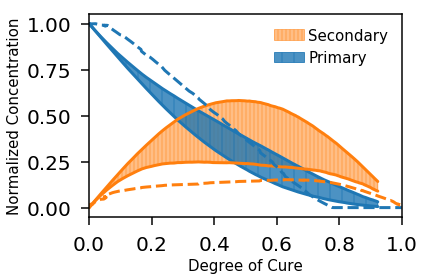

In [38]:
path = "/home/mikehenry/epoxy-stuff/LB_mixing_post_process"
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})

for job in jobs:
    if job._id == "998d6cd1126f71497f7116e79f2cfd46":
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
        cure_fractions = np.asarray(df["#doc"])
        primaryA_cnts = np.asarray(df["primaryA"]) # 0
        secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
        ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
        quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
        fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
        scale_factor = primaryA_cnts[0]*2
        primaryA_cnts=primaryA_cnts/scale_factor # 0
        secondaryA_cnts=secondaryA_cnts/scale_factor # 1
        ternaryA_cnts=ternaryA_cnts/scale_factor # 2
        quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
        fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

        P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
        P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0

        S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
        S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts

        T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
        T_low = quarternaryA_cnts+fivernaryA_cnts*2

        plt.plot(cure_fractions, P_high, color='#1f77b4')
        plt.plot(cure_fractions, P_low, color='#1f77b4')
        
        #plt.plot(cure_fractions, T_high, color="#2ca02c")
        #plt.plot(cure_fractions, T_low, color="#2ca02c")

        plt.plot(cure_fractions, S_high, color="#ff7f0e")
        plt.plot(cure_fractions, S_low, color="#ff7f0e")




        plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
        #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
        plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
plt.plot(doc,pa, color='#1f77b4', linestyle='--')
plt.plot(doc,sa, color='#ff7f0e', linestyle='--')
#plt.plot(doc,ta, color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})

plt.xlabel("Degree of Cure", size=15)
plt.ylabel("Normalized Concentration", size=15)
plt.xlim(0,1)
plt.savefig("doc_exp_sim_tg.png", transparent=True)

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


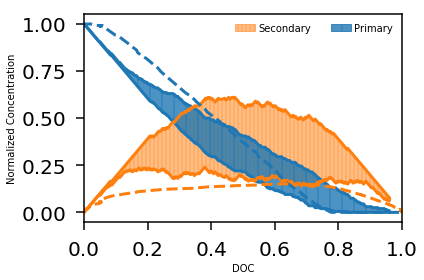

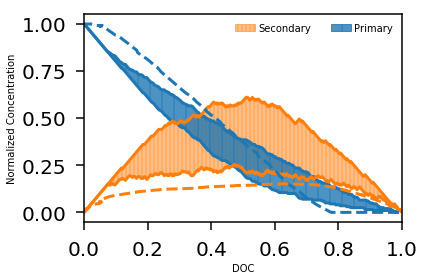

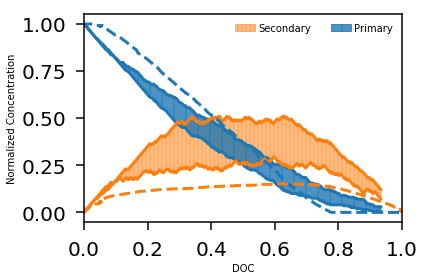

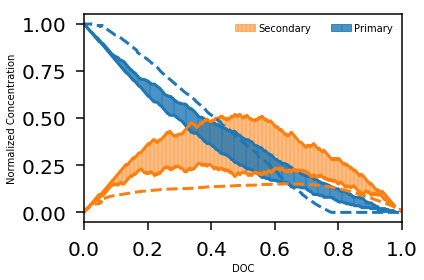

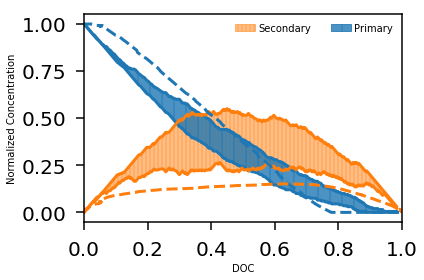

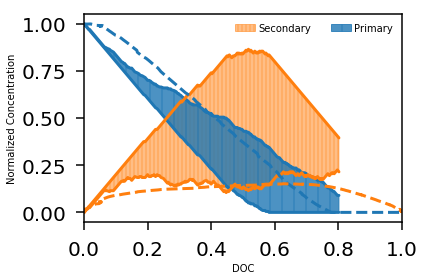

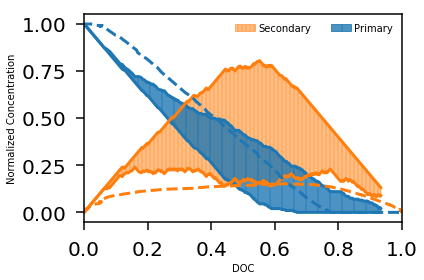

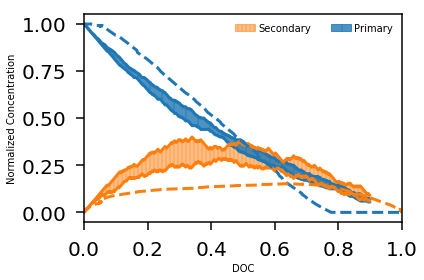

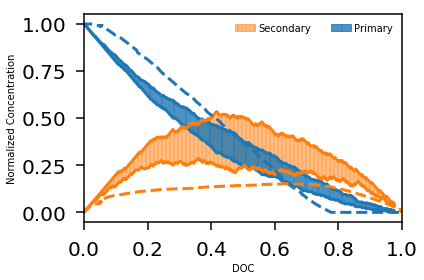

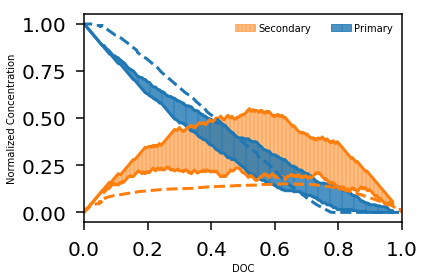

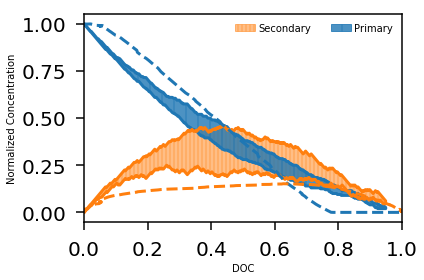

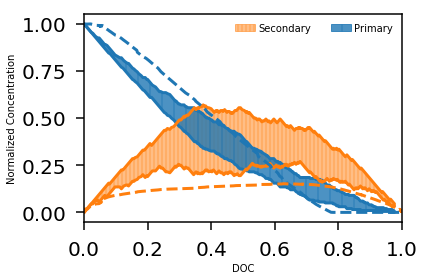

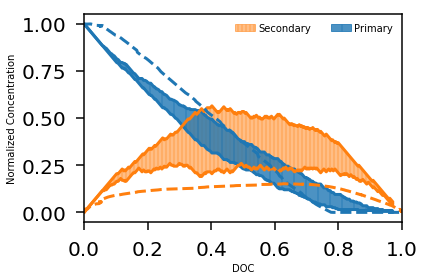

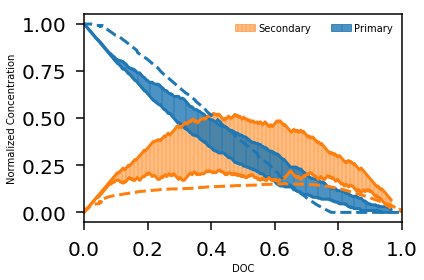

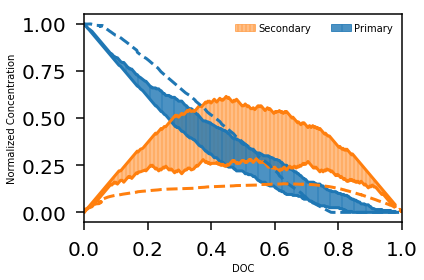

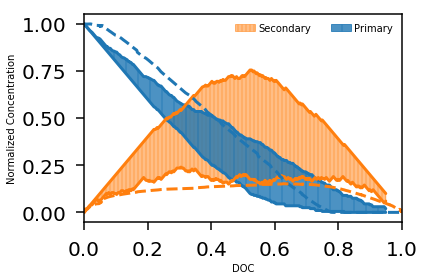

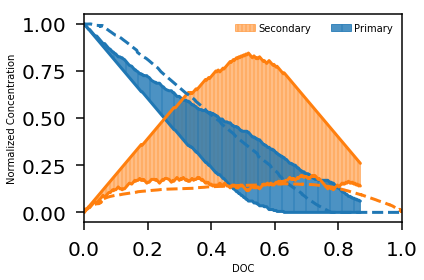

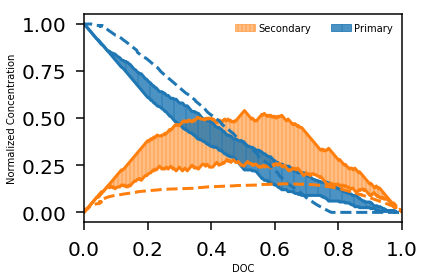

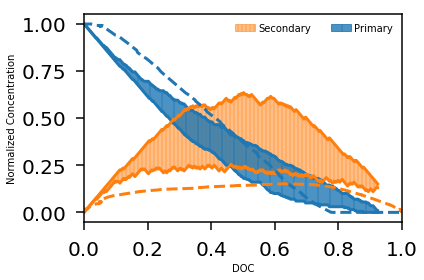

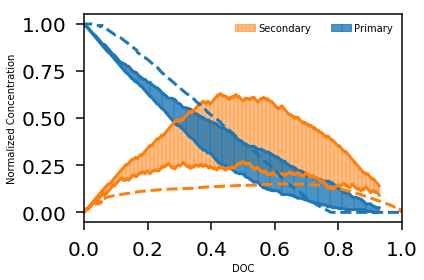

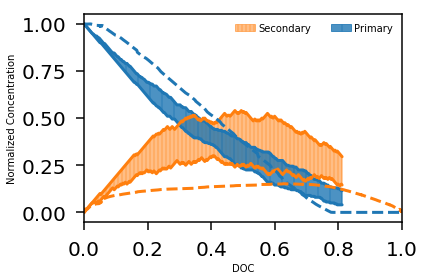

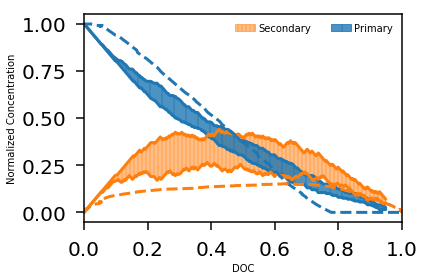

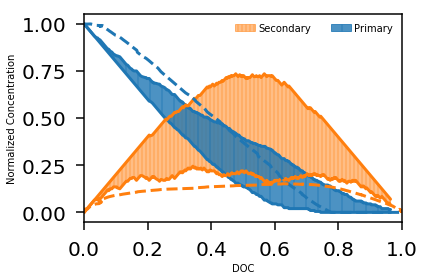

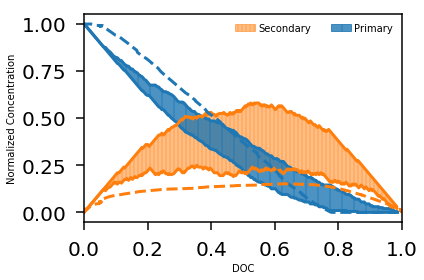

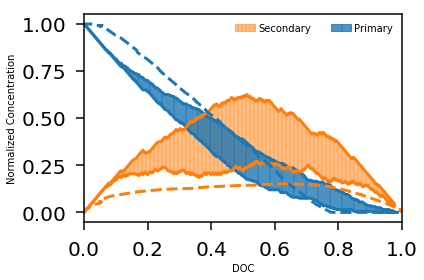

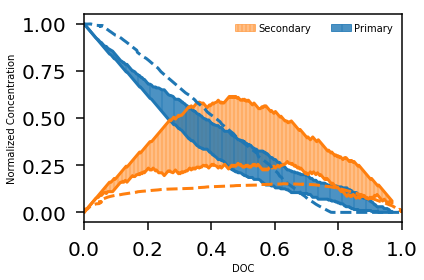

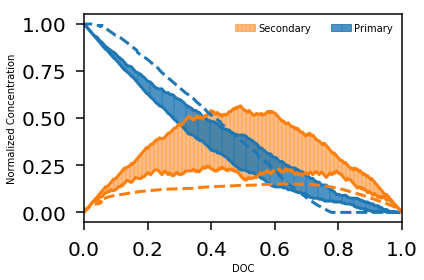

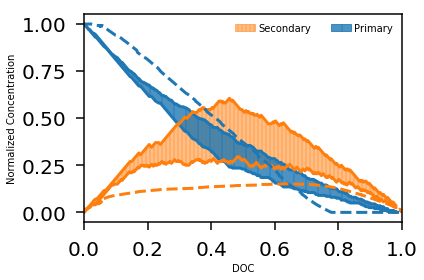

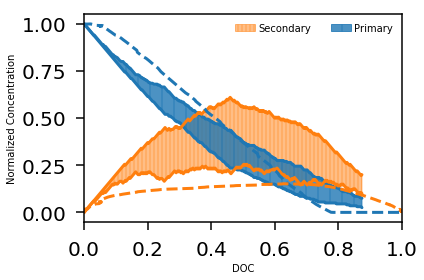

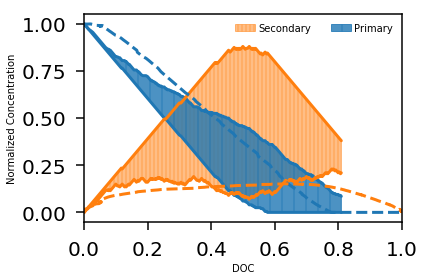

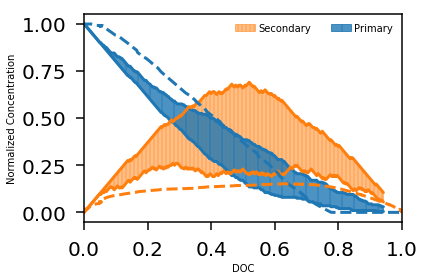

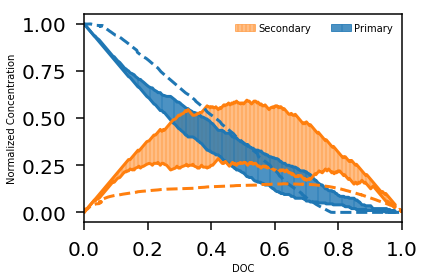

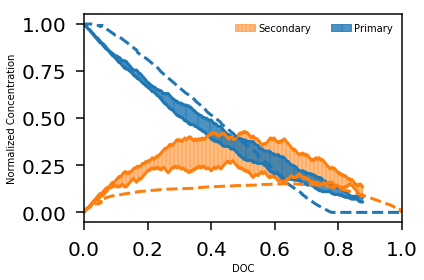

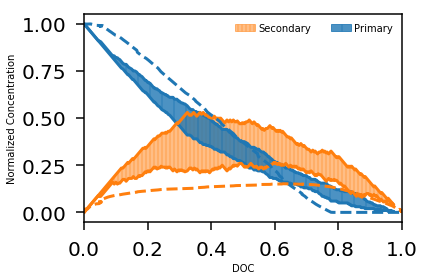

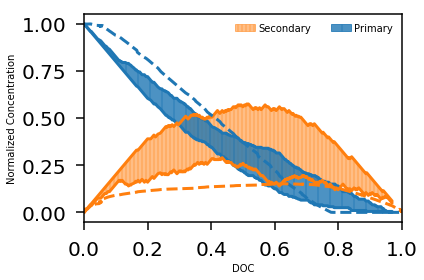

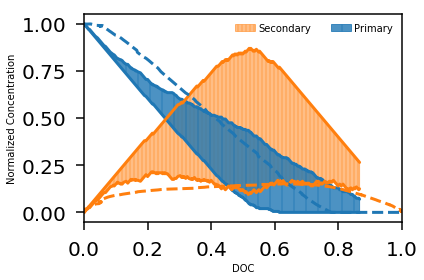

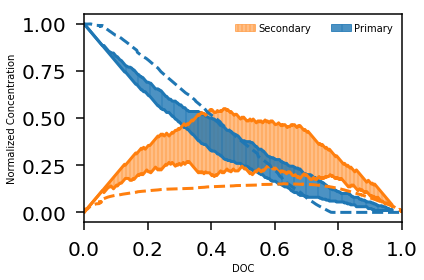

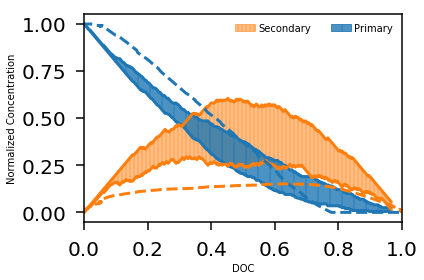

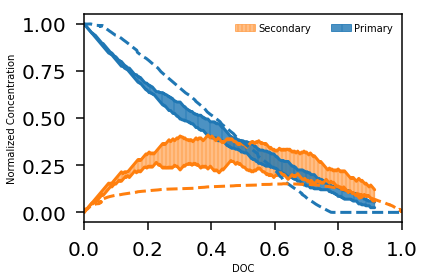

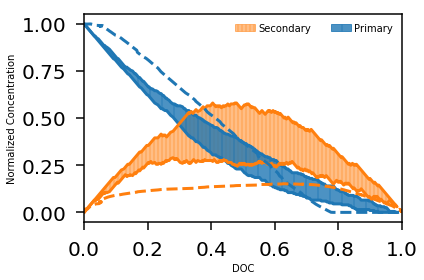

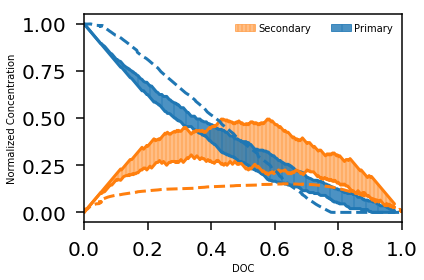

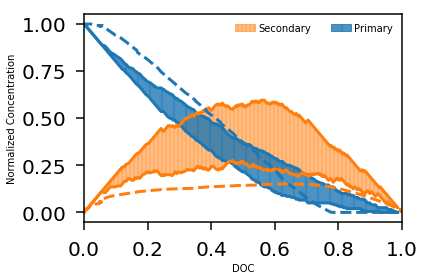

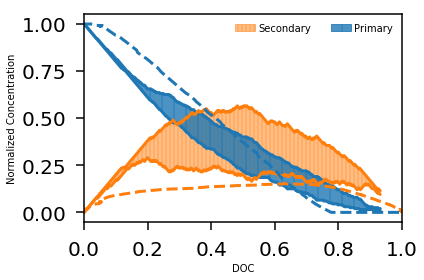

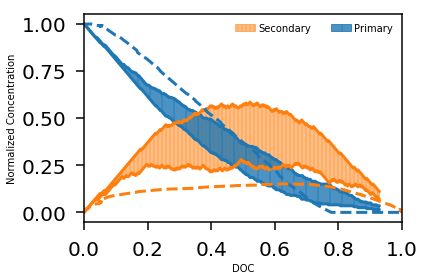

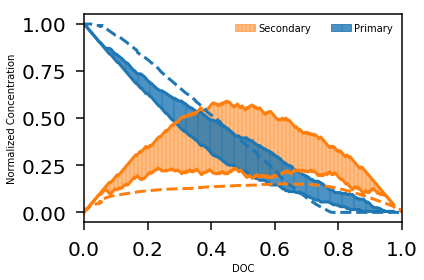

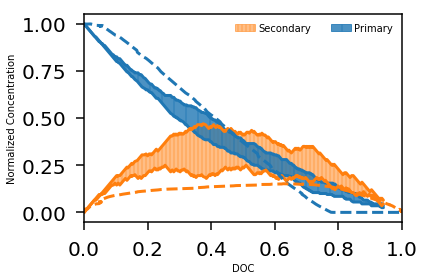

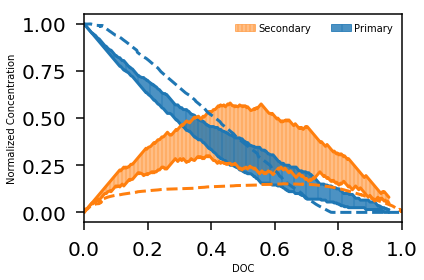

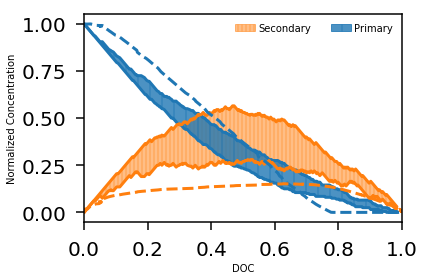

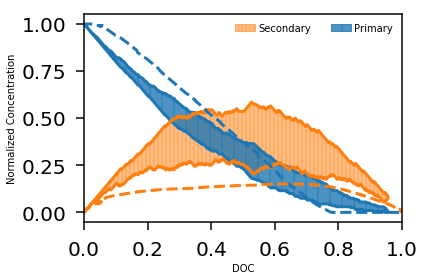

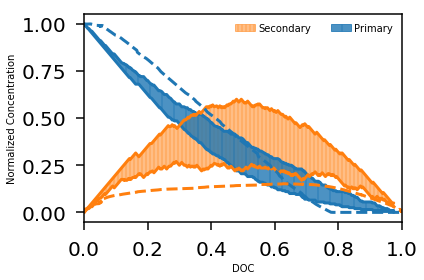

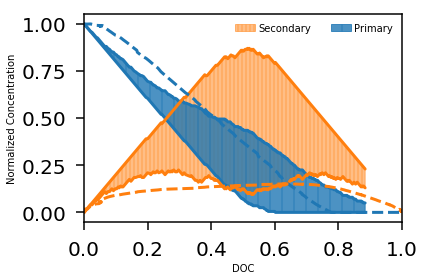

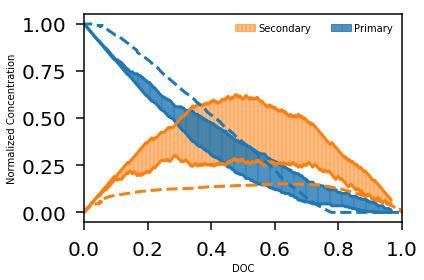

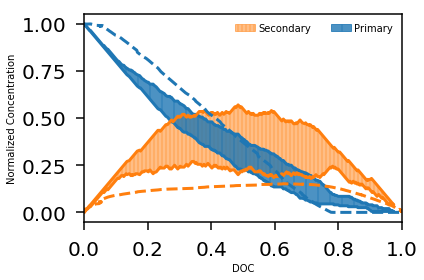

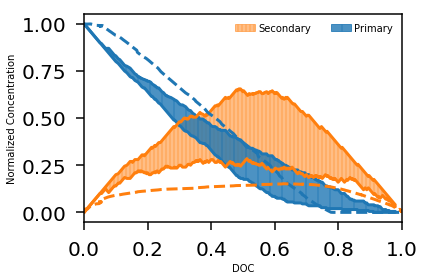

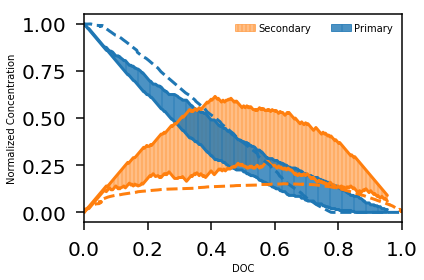

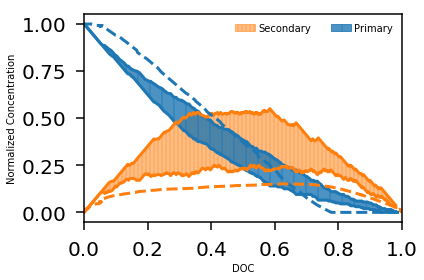

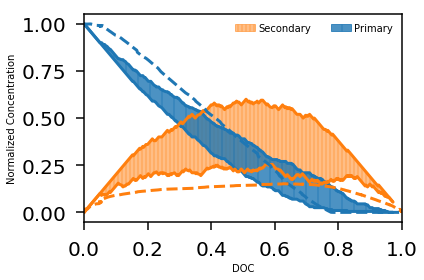

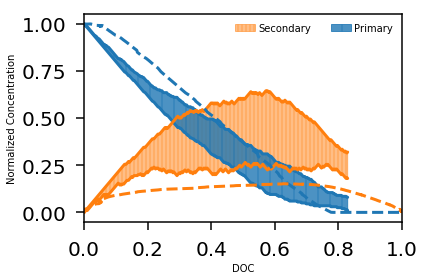

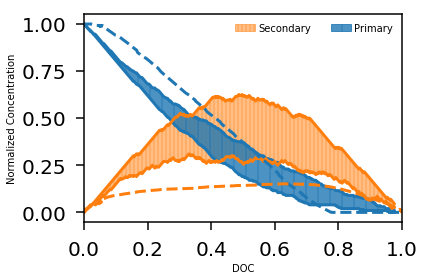

In [42]:
#jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"$and":[{"kT": 3.5,"activation_energy":1.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
#jobs = project.find_jobs(filter={"$and":[{"sec_bond_weight":100, "kT": 1.0,"activation_energy":3.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
#jobs = project.find_jobs(filter={"$and":[{"sec_bond_weight":100, "kT": 1.0,"activation_energy":3.0,}]}, doc_filter={"cure_percent":{"$gte":80}})
jobs = project.find_jobs(filter={"kT": 3.5}, doc_filter={"cure_percent":{"$gte":80}})
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})


exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]

for job in jobs:
    #if job.doc.FO_model_R2:
    #    print(job._id, round(job.doc.FO_model_R2, 4))
    #else:
    #    print(job._id)
    df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"]) # 0
    secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
    ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
    quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
    fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4

    scale_factor = primaryA_cnts[0]*2

    primaryA_cnts=primaryA_cnts/scale_factor # 0
    secondaryA_cnts=secondaryA_cnts/scale_factor # 1
    ternaryA_cnts=ternaryA_cnts/scale_factor # 2
    quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
    fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

    P_high = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts
    P_low =  primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0

    S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
    S_low =  secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts

    T_high = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts*2
    T_low = quarternaryA_cnts+fivernaryA_cnts*2

    plt.plot(cure_fractions, P_high, color='#1f77b4')
    plt.plot(cure_fractions, P_low, color='#1f77b4')

    #plt.plot(cure_fractions, T_high, color="#2ca02c")
    #plt.plot(cure_fractions, T_low, color="#2ca02c")

    plt.plot(cure_fractions, S_high, color="#ff7f0e")
    plt.plot(cure_fractions, S_low, color="#ff7f0e")




    plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
    #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
    plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        

    plt.plot(doc,pa, color='#1f77b4', linestyle='--')
    plt.plot(doc,sa, color='#ff7f0e', linestyle='--')
    #plt.plot(doc,ta, color='#2ca02c', linestyle='--')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)

    plt.xlabel("DOC")
    plt.ylabel("Normalized Concentration")
    plt.xlim(0,1)
    plt.show()

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


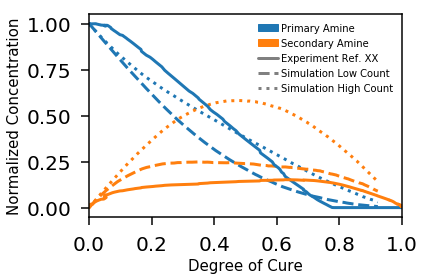

In [78]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

path = "/home/mikehenry/epoxy-stuff/LB_mixing_post_process"
path = "/home/mikehenry/epoxy-stuff/doc_test_enth"

project = signac.get_project(path)
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})

for job in jobs:
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except(FileNotFoundError):
        continue
    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"]) # 0
    secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
    ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
    quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
    fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
    scale_factor = primaryA_cnts[0]*2
    primaryA_cnts=primaryA_cnts/scale_factor # 0
    secondaryA_cnts=secondaryA_cnts/scale_factor # 1
    ternaryA_cnts=ternaryA_cnts/scale_factor # 2
    quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
    fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

    P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
    P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0

    S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
    S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts

    T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
    T_low = quarternaryA_cnts+fivernaryA_cnts*2

    plt.plot(cure_fractions, P_high, color='#1f77b4', linestyle=":", label="high")
    plt.plot(cure_fractions, P_low, color='#1f77b4', linestyle="--", label="low")

    #plt.plot(cure_fractions, T_high, color="#2ca02c")
    #plt.plot(cure_fractions, T_low, color="#2ca02c")

    plt.plot(cure_fractions, S_high, color="#ff7f0e", linestyle=":")
    plt.plot(cure_fractions, S_low, color="#ff7f0e", linestyle="--")




        #plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
        #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
        #plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
plt.plot(doc,pa, color='#1f77b4', linestyle='-', label="exp")
plt.plot(doc,sa, color='#ff7f0e', linestyle='-')
#plt.plot(doc,ta, color='#2ca02c', linestyle='--')

primary = mpatches.Patch(color='#1f77b4', label='Primary Amine')
seconday = mpatches.Patch(color='#ff7f0e', label='Secondary Amine')
exp = mlines.Line2D([], [], color='grey', linestyle='-', label="Experiment Ref. XX")
high = mlines.Line2D([], [], color='grey', linestyle=':', label="Simulation High Count")
low = mlines.Line2D([], [], color='grey', linestyle='--', label="Simulation Low Count")



handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})
plt.legend(handles=[primary,seconday,exp, low, high])


plt.xlabel("Degree of Cure", size=15)
plt.ylabel("Normalized Concentration", size=15)
plt.xlim(0,1)
plt.savefig("doc_exp_sim_tg.png", transparent=True)

85b57c6414e4b85a49df0eb9a2921ee0 0.9911
cfc0b86410f62f653fadec574941fd31 0.9708
e77104a3da5b8c018cc579444356dc0d 0.9634
514e034d0d4522e8152b44b611eaf060 0.9869
fee24a75282f9285b22d0e3da8c28892 0.9755
d0ea8681944ad25eb9a3e366b860c633 0.9968


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


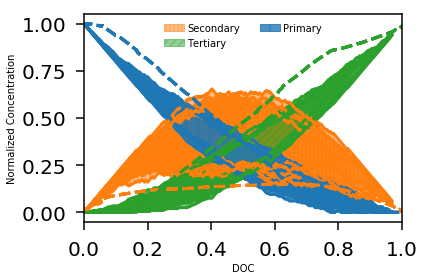

In [30]:
#jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"$and":[{"kT": 3.5,"activation_energy":1.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
#jobs = project.find_jobs(filter={"$and":[{"sec_bond_weight":100, "kT": 1.0,"activation_energy":3.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
jobs = project.find_jobs(filter={"$and":[{"sec_bond_weight":1.2, "activation_energy":3.0,}]}, doc_filter={"cure_percent":{"$gte":0}})
#jobs = project.find_jobs(filter={"kT": 3.5}, doc_filter={"cure_percent":{"$gte":0}})
#jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":0}})


exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]

for job in jobs:
    if job.doc.FO_model_R2:
        print(job._id, round(job.doc.FO_model_R2, 4))
    else:
        print(job._id)
    df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"]) # 0
    secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
    ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
    quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
    fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4

    scale_factor = primaryA_cnts[0]*2

    primaryA_cnts=primaryA_cnts/scale_factor # 0
    secondaryA_cnts=secondaryA_cnts/scale_factor # 1
    ternaryA_cnts=ternaryA_cnts/scale_factor # 2
    quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
    fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4
             # 0                # 1                # 2
    P_high = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts
    P_low =  primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0
              # 1                 # 2             # 3
    S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
    S_low =  secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts
             # 2                 #3                    #4
    T_high = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts*2
    T_low =                  quarternaryA_cnts + fivernaryA_cnts*2

    plt.plot(cure_fractions, P_high, color='#1f77b4')
    plt.plot(cure_fractions, P_low, color='#1f77b4')

    plt.plot(cure_fractions, T_high, color="#2ca02c")
    plt.plot(cure_fractions, T_low, color="#2ca02c")

    plt.plot(cure_fractions, S_high, color="#ff7f0e")
    plt.plot(cure_fractions, S_low, color="#ff7f0e")




    plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
    plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
    plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        

    plt.plot(doc,pa, color='#1f77b4', linestyle='--')
    plt.plot(doc,sa, color='#ff7f0e', linestyle='--')
    plt.plot(doc,ta, color='#2ca02c', linestyle='--')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)

    plt.xlabel("DOC")
    plt.ylabel("Normalized Concentration")
    plt.xlim(0,1)
plt.show()

In [ ]:
Ea = [1.0, 2.0, 3.0, 10]
sec_bond_weight = [0.5, 1.2, 5, 10, 100]

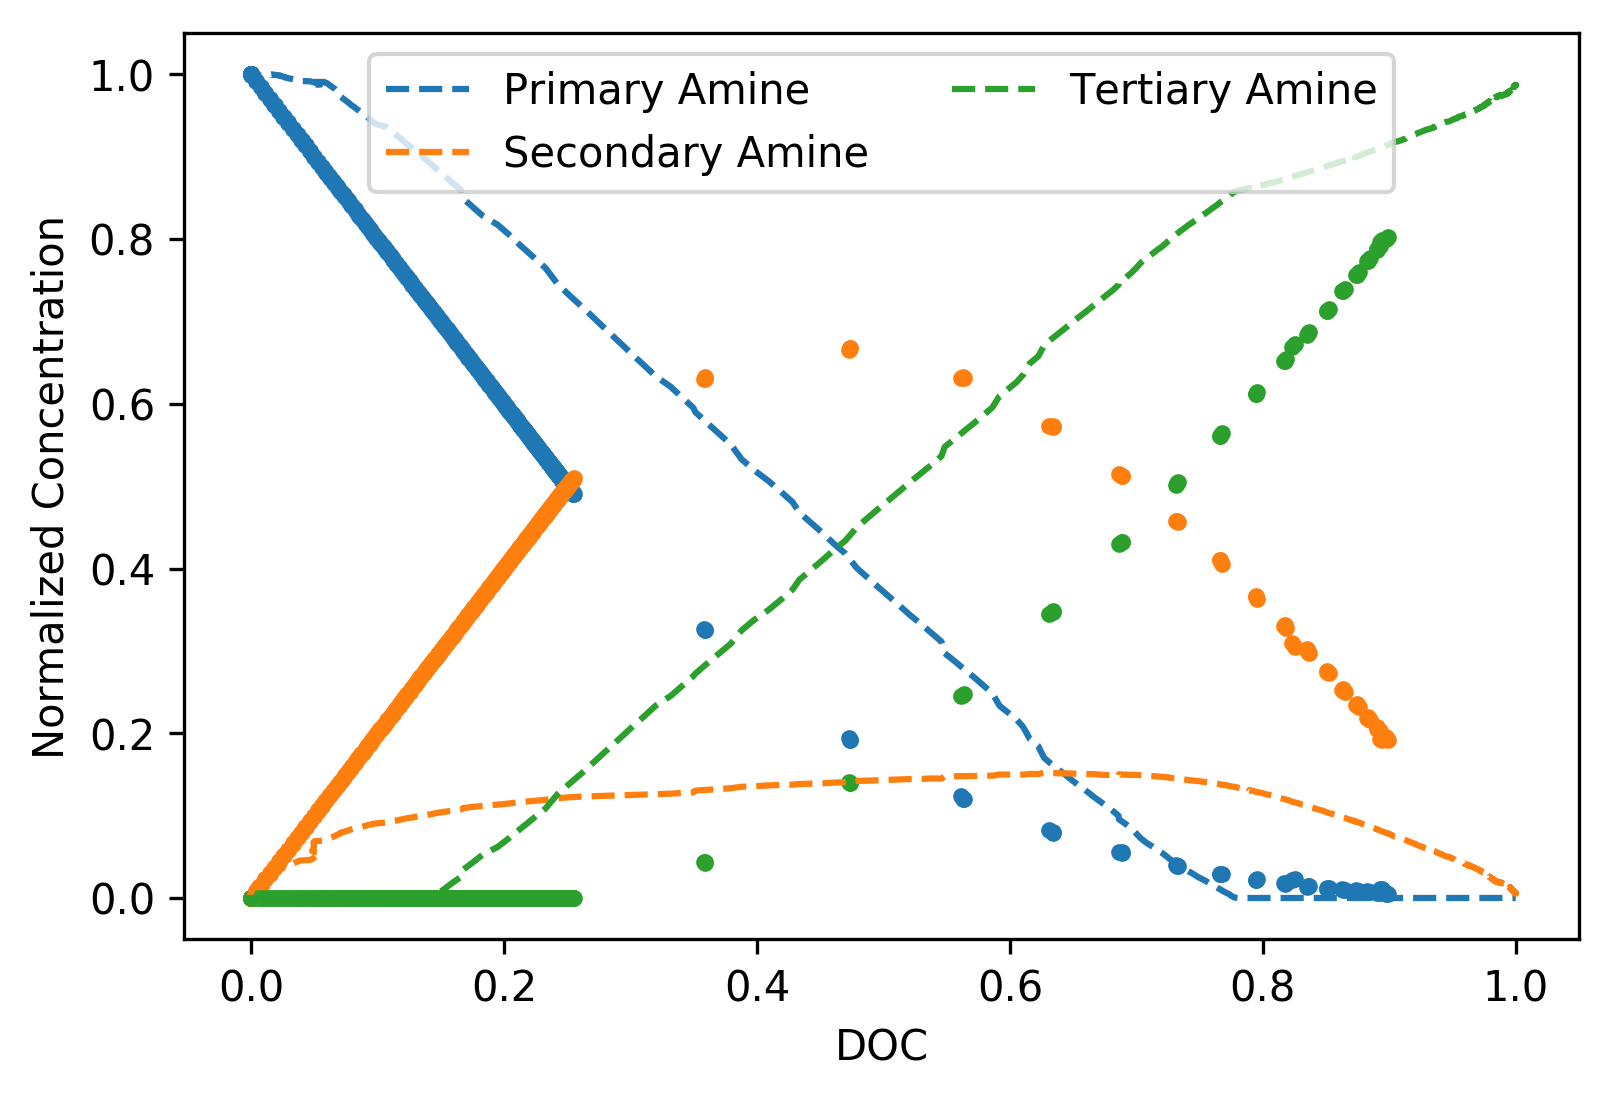

In [5]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict


#project = signac.get_project()
jobs = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")
jobs = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal-2-bond-rank")
#jobs = project.find_jobs(doc_filter={
#    "$and":[
#        {"cure_percent":{"$gte":90},
#        "mike_A": {"$lt":2}}
#                                     ]})
#jobs = project.find_jobs(doc_filter={"mike_A":1.0})
#jobs = signac.get_project()

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))
for job in jobs:
    #print(job._id)
    A = job.sp.percent_bonds_per_step/job.sp.bond_period
    job.doc.mike_A = A
    #A = job.doc.mike_A
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except FileNotFoundError:
        continue
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()

In [5]:
for job in jobs:
    if job.doc.mike_A == 0.1:
        print(job.sp.percent_bonds_per_step, job.sp.bond_period)

1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

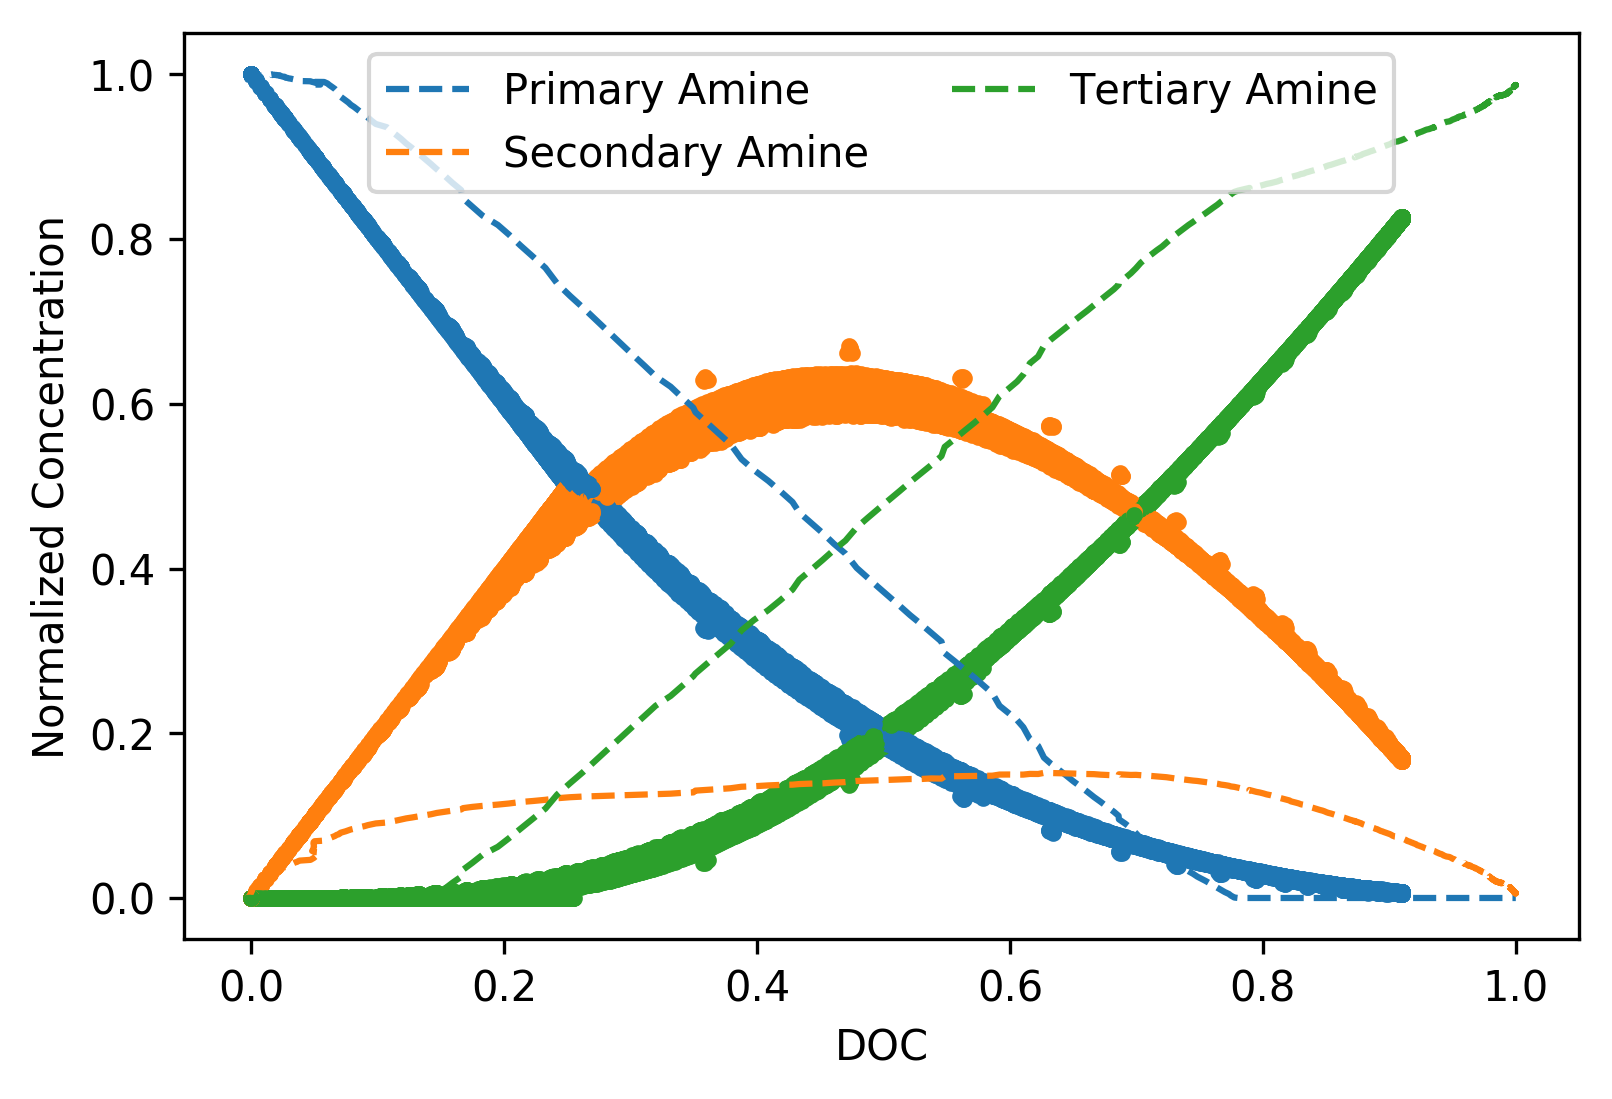

In [3]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict


#project = signac.get_project()
jobs = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")
jobs = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal-2-bond-rank")
#jobs = project.find_jobs(doc_filter={
#    "$and":[
#        {"cure_percent":{"$gte":90},
#        "mike_A": {"$lt":2}}
#                                     ]})
#jobs = project.find_jobs(doc_filter={"mike_A":1.0})
#jobs = signac.get_project()

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))
for job in jobs:
    #print(job._id)
    A = job.sp.percent_bonds_per_step/job.sp.bond_period
    job.doc.mike_A = A
    #A = job.doc.mike_A
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except FileNotFoundError:
        continue
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

jobs = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal")
#jobs = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal-2-bond-rank")
    
for job in jobs:
    #print(job._id)
    A = job.sp.percent_bonds_per_step/job.sp.bond_period
    job.doc.mike_A = A
    #A = job.doc.mike_A
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except FileNotFoundError:
        continue
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)

jobs = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")

for job in jobs:
    #print(job._id)
    A = job.sp.percent_bonds_per_step/job.sp.bond_period
    job.doc.mike_A = A
    #A = job.doc.mike_A
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except FileNotFoundError:
        continue
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)    
    
#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()

9ddcbcda1ac223fbc8ad19a525890f0a 1e-05 1.5 0.0001 4.0 1.2
b77375b03305cc4218812f61238a4f0b 0.0 1.0 0.0001 2.0 1.2
3f222749dec3752f6b2ebdafa123e3f8 1e-07 1.0 0.0001 1.0 1.2
8b32b97efaa0c1912145ea34ffc61d00 1e-07 1.5 0.0001 2.0 1.2
84fedbe93bfe55e82e449a4031b687a3 1e-06 1.5 0.0001 3.0 0.5
d3065fc67ace3cd9d8eca2d7ba718049 1e-05 0.5 0.0001 2.0 0.5
a33e085e2ffc789b45feda17efdc97e7 1e-07 1.5 0.0001 3.0 0.5
6ab6321e9b7bb72790f93d154b6d71d8 1e-06 1.5 0.0001 3.0 1.2
41c5d38ec9dcfe73bdb69cf9de3b74f0 0.0 1.5 0.0001 2.0 1.2
a42a8e825864b6bfae035c57032f6625 0.0 1.0 0.0001 1.0 0.5
094544b764f0d1eaa30043b2c33ef6cd 1e-06 1.5 0.0001 2.0 1.2
3b42af5cc783427a3608a54fa1c7e958 0.0 1.5 0.0001 2.0 0.5
425f7812123ade6728985880862623ef 1e-06 1.0 0.0001 3.0 0.5
cfe570fce32c7e1ca06ac969370884ac 1e-06 1.0 0.0001 2.0 1.2
f1007bc73d4dd34cee23c7d34ffb5a3e 0.0 1.0 0.0001 3.0 0.5
ec64b8d286f16e66a995549bbd9ebadc 1e-07 1.5 0.0001 5.0 0.5
d1125259d1fe246607ea613977a1cdf7 1e-06 1.5 0.0001 2.0 0.5
46491ef73de6acf6fc178d30

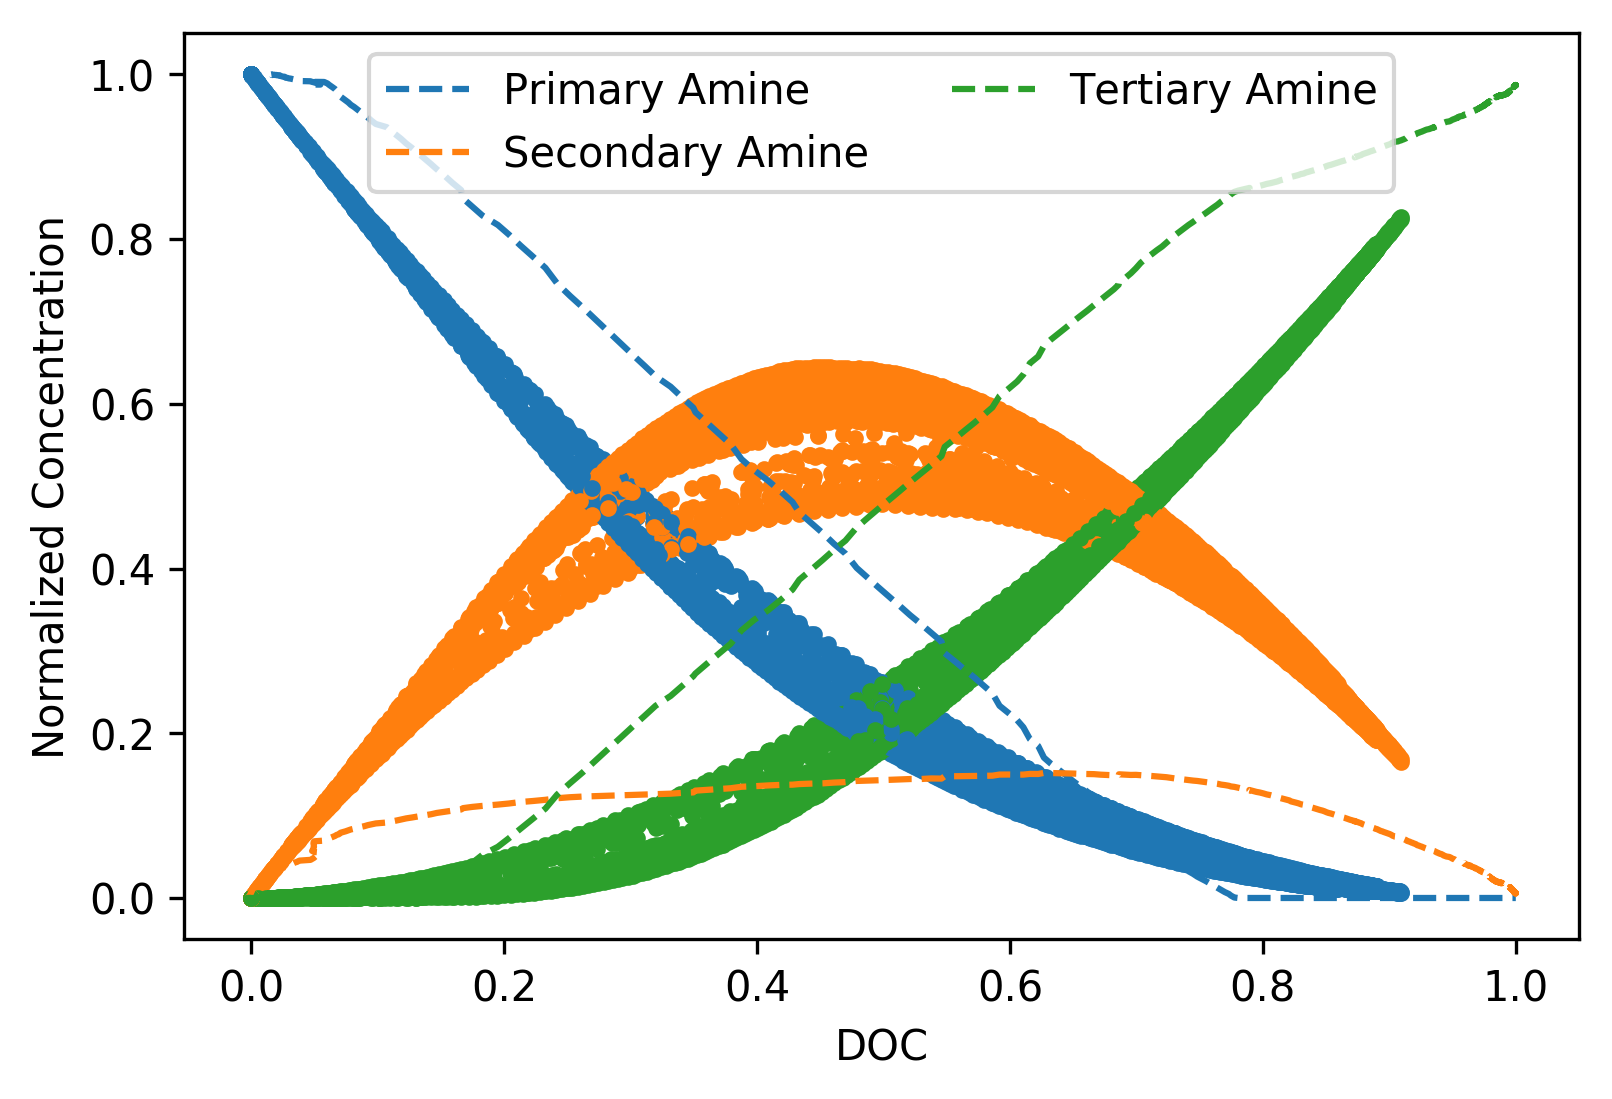

In [3]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline


#project = signac.get_project()
project = signac.get_project("/home/mikehenry/epoxy-stuff/flow-enth-test")
jobs = project.find_jobs(doc_filter={
    "$and":[
        {"cure_percent":{"$gte":90},
        "mike_A": {"$lt":2}}
                                     ]})
#jobs = project.find_jobs(filter={"activation_energy":[5.0,3.0]},doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"activation_energy":5.0},doc_filter={"cure_percent":{"$gte":80}})
jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})

#jobs = project.find_jobs(doc_filter={"mike_A":1.0})
#jobs = signac.get_project("/home/mikehenry/epoxy-stuff/flow-enth-test")

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))
for job in jobs:
    #print(job._id)
    try:
        A = job.doc.mike_A
    except(AttributeError):
        job.doc.mike_A = job.sp.percent_bonds_per_step / job.sp.bond_period

    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except(FileNotFoundError):
        continue
    print(job, job.sp.deltaT, job.sp.kT, job.doc.mike_A, job.sp.activation_energy, job.sp.sec_bond_weight)
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()

94cfbd1781792fba53d42c1360b3f9e4 0.0 1.0 0.0001 1.0 1.0
40d916618c9d4b50cc7cd1585dc1ea0a 0.0 1.0 0.0001 1.0 2.0
542aabfc738b1059c3b420fd1834754a 0.0 1.0 0.0001 1.0 5.0
0045b432d53c1d1a58ef959e23202506 0.0 1.0 0.0001 1.0 10
f6e3f7bd31cde3bb6c24c50643777c58 0.0 1.0 0.0001 2.0 1.0
a81d6de0b015de3663156b32e9c6bcb1 0.0 1.0 0.0001 2.0 2.0
85a9c8c8943b0bbcc86c98ad367bb1e5 0.0 1.0 0.0001 2.0 5.0
27825b720c5668479d4d2d24dec95005 0.0 1.0 0.0001 2.0 10
1e83d0e37d83490946a24fd0293b1177 0.0 1.0 0.0001 5.0 1.0
58e103682ba6b586b55f2ba216304606 0.0 1.0 0.0001 5.0 2.0
df4e27c551310aa66478999a02b0118c 0.0 1.0 0.0001 5.0 5.0
430f1598521353e40b66ecfdaf9f4209 0.0 1.0 0.0001 5.0 10
7fc96d152585a443d447d60832013491 0.0 1.0 0.0001 10 1.0
d127a68e3bfcb3bec8d85a46f0d1c399 0.0 1.0 0.0001 10 2.0
1dadb87cff474a8ae4f38dca0d3c555e 0.0 1.0 0.0001 10 5.0
fcd7c2e6315f8d7c07406a8257b1d55d 0.0 1.0 0.0001 10 10


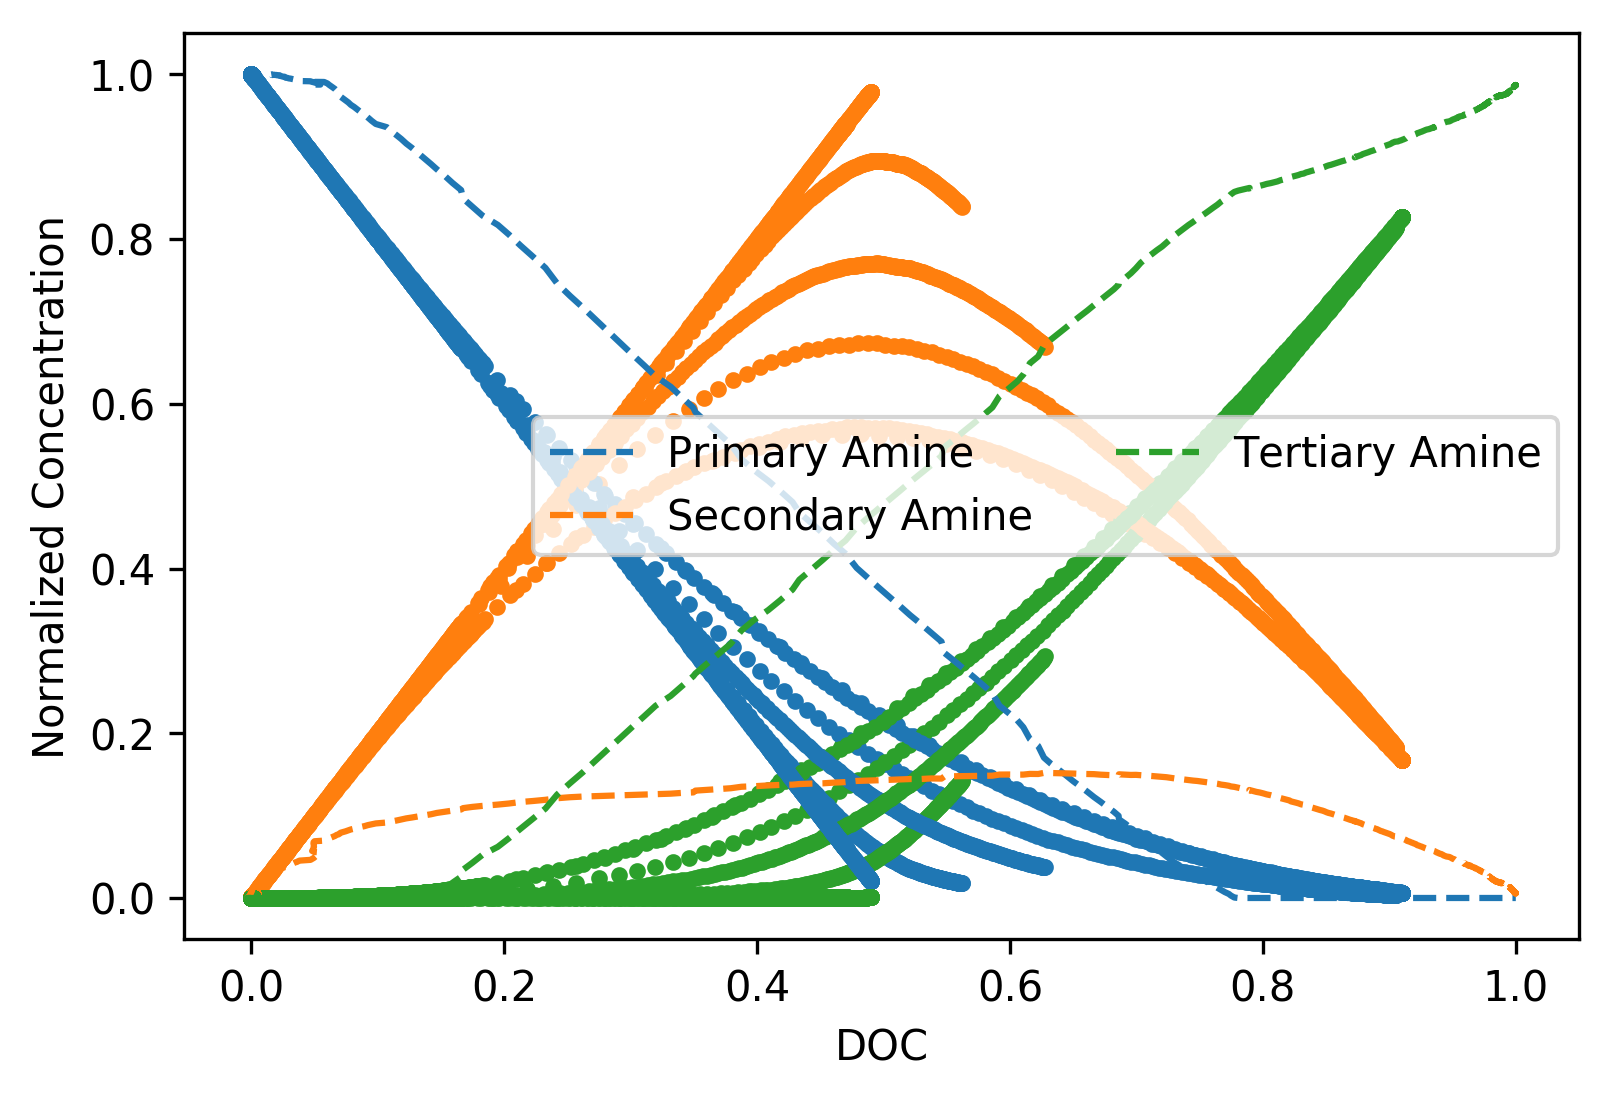

In [4]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline


#project = signac.get_project()
project = signac.get_project("/home/mikehenry/epoxy-stuff/flow-enth-test")
jobs = project.find_jobs(doc_filter={
    "$and":[
        {"cure_percent":{"$gte":90},
        "mike_A": {"$lt":2}}
                                     ]})
#jobs = project.find_jobs(filter={"activation_energy":[5.0,3.0]},doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs(filter={"activation_energy":5.0},doc_filter={"cure_percent":{"$gte":80}})
jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})

#jobs = project.find_jobs(doc_filter={"mike_A":1.0})
jobs = signac.get_project("/home/mikehenry/epoxy-stuff/flow-enth-test")

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))
for job in jobs:
    #print(job)
    try:
        A = job.doc.mike_A
    except(AttributeError):
        job.doc.mike_A = job.sp.percent_bonds_per_step / job.sp.bond_period

    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except(FileNotFoundError):
        continue
    #print(job, job.sp.deltaT, job.sp.kT, job.doc.mike_A, job.sp.activation_energy, job.sp.sec_bond_weight)
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()

In [6]:
"/home/mikehenry/epoxy-stuff/tmp-wrk/workspace"

Help on method find_jobs in module signac.contrib.project:

find_jobs(filter=None, doc_filter=None, index=None) method of signac.contrib.project.Project instance
    Find all jobs in the project's workspace.
    
    The optional filter arguments must be a Mapping of key-value
    pairs and JSON serializable.
    
    .. note::
        Providing a pre-calculated index may vastly increase the
        performance of this function.
    
    :param filter: A mapping of key-value pairs that all
        indexed job statepoints are compared against.
    :type filter: Mapping
    :param doc_filter: A mapping of key-value pairs that all
        indexed job documents are compared against.
    :yields: Instances of :class:`~signac.contrib.job.Job`
    :raise TypeError: If the filters are not JSON serializable.
    :raises ValueError: If the filters are invalid.
    :raises RuntimeError: If the filters are not supported
        by the index.



58fd23f402e65cd9d4e97a86a44b1821 0.0001 1.5 0.0001 2.0 1.2


AssertionError: 

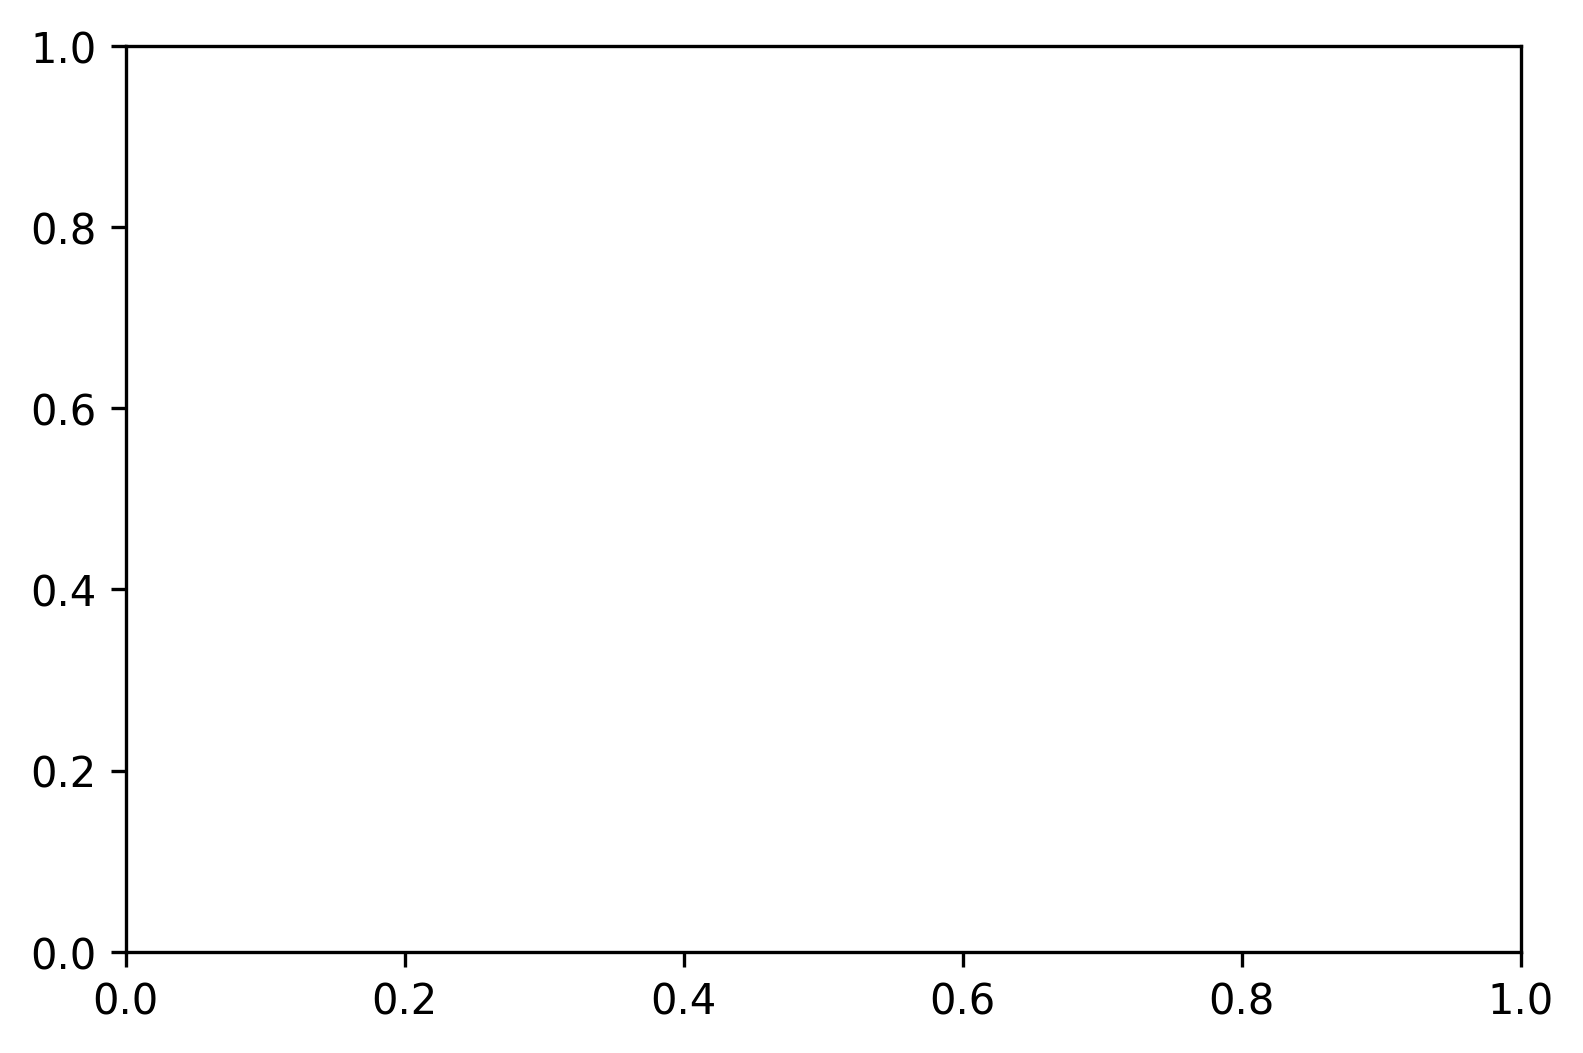

In [14]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline


#project = signac.get_project()
project = signac.get_project("/home/mikehenry/epoxy-stuff/tmp-wrk/")
#jobs = signac.get_project("/home/mikehenry/epoxy-stuff/tmp-wrk/")
jobs = project.find_jobs(doc_filter={
    "$and":[
        {"cure_percent":{"$gte":90},
        "mike_A": {"$lt":10}}
                                     ]})
#jobs = project.find_jobs(filter={"activation_energy":[5.0,3.0]},doc_filter={"cure_percent":{"$gte":80}})
#jobs = project.find_jobs("/home/mikehenry/epoxy-stuff/tmp-wrk/",filter={"activation_energy":5.0})
#jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})

#jobs = project.find_jobs(filter={"job": "58fd23f402e65cd9d4e97a86a44b1821"})
#jobs = signac.get_project("/home/mikehenry/epoxy-stuff/tmp-wrk/")

fig,ax1 = plt.subplots(dpi=300)

norm=plt.Normalize(2.5e-05,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])
norm=matplotlib.colors.LogNorm(vmin=2.5e-05, vmax=1.0)
#for A, jobs in jobs.groupbydoc("mike_A"):
    #fig,ax1 = plt.subplots(dpi=300)
    #print(A)
    #print(type(A))

for job in jobs:
    #print(job)
    try:
        A = job.doc.mike_A
    except(AttributeError):
        job.doc.mike_A = job.sp.percent_bonds_per_step / job.sp.bond_period

    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except(FileNotFoundError):
        continue
    print(job, job.sp.deltaT, job.sp.kT, job.doc.mike_A, job.sp.activation_energy, job.sp.sec_bond_weight)


        
    #print(job, job.sp.deltaT, job.sp.kT, job.doc.mike_A, job.sp.activation_energy, job.sp.sec_bond_weight)
    
    #df = pd.read_csv(job.fn("species.log"), delimiter="\t")

    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"])
    secondaryA_cnts = np.asarray(df["secondaryA"])
    ternaryA_cnts = np.asarray(df["ternaryA"])
    quarternaryA_cnts = np.asarray(df["quarternaryA"])
    fivernaryA_cnts = np.asarray(df["fivernaryA"])
    scale_factor = primaryA_cnts[0]*2
    #scale_factor = primaryA_cnts[0]


    primaryA_cnts=primaryA_cnts/scale_factor
    secondaryA_cnts=secondaryA_cnts/scale_factor
    ternaryA_cnts=ternaryA_cnts/scale_factor
    quarternaryA_cnts=quarternaryA_cnts/scale_factor
    fivernaryA_cnts=fivernaryA_cnts/scale_factor
    
    n_zero_bonds = primaryA_cnts
    n_one_bonds = secondaryA_cnts
    n_two_bonds = ternaryA_cnts
    n_three_bonds = quarternaryA_cnts
    n_four_bonds = fivernaryA_cnts
    
    #primaryA_cnts_R = primaryA_cnts*2 + secondaryA_cnts + ternaryA_cnts*0 + quarternaryA_cnts*0 + fivernaryA_cnts*0
    #secondaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts + fivernaryA_cnts*0 
    #ternaryA_cnts_R = primaryA_cnts*0 + secondaryA_cnts*0 + ternaryA_cnts*0 + quarternaryA_cnts + fivernaryA_cnts*2
    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_one_bonds*1 + n_two_bonds*2 + n_three_bonds*1
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    

    
    primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    secondaryA_cnts_R = n_two_bonds*2 
    #ternaryA_cnts_R = 1 - (primaryA_cnts_R + secondaryA_cnts_R)
    ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2
    
#0/1/2/3/4 bonds =  2/1/0/0/0 primary amines
#0/1/2/3/4 bonds =  0/1/2/1/0 secondary amines
#0/1/2/3/4 bonds =  0/0/0/1/2 tertiary amines

    #primaryA_cnts_R = n_zero_bonds*2 + n_one_bonds*1
    #secondaryA_cnts_R = n_one_bonds*1+ n_two_bonds*2 + n_three_bonds
    #ternaryA_cnts_R = n_three_bonds*1 + n_four_bonds*2 #1 - (primaryA_cnts_R + secondaryA_cnts_R)
    
    
    ##ternaryA_cnts_R = primaryA_cnts_R - secondaryA_cnts_R
    #primaryA_cnts_R = n_zero_bonds + n_one_bonds
    #secondaryA_cnts_R = n_three_bonds 
    #ternaryA_cnts_R = n_three_bonds + n_four_bonds
    
    assert np.allclose((primaryA_cnts_R + secondaryA_cnts_R + ternaryA_cnts_R), [1]*len(primaryA_cnts_R))


    #ternaryA_cnts_R = ternaryA_cnts + quarternaryA_cnts + fivernaryA_cnts
    
    ##ax1.plot(cure_fractions,n_zero_bonds, label='Primary Amine',color='#f2f0f7', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_one_bonds, label='One Bond', color='#cbc9e2', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_two_bonds, label='Two Bonds',color='#9e9ac8', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_three_bonds, label='Three Bonds',color='#756bb1', marker=".", linestyle = 'None',)
    ##ax1.plot(cure_fractions,n_four_bonds, label='Four Bonds', color='#54278f', marker=".", linestyle = 'None',)
    #ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    #ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    #ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #if job.sp.sec_bond_weight == 5.0:
      #  print(job, job.sp.deltaT, job.sp.kT, job.doc.mike_A, job.sp.activation_energy, job.sp.sec_bond_weight)
    
    ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='#ff7f0e', marker=".", linestyle = 'None',)
    ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    
    #else:
        #ax1.plot(cure_fractions,primaryA_cnts_R, label='Primary Amine',color='#1f77b4', marker=".", linestyle = 'None',)
        #ax1.plot(cure_fractions,secondaryA_cnts_R, label='Secondary Amine', color='red', marker=".", linestyle = 'None',)
        #ax1.plot(cure_fractions,ternaryA_cnts_R, label='Tertiary Amine',color='#2ca02c', marker=".", linestyle = 'None',)
    #ax1.scatter(cure_fractions,primaryA_cnts, label='sim 0',c=[A]*len(cure_fractions), norm=norm, marker="+", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,secondaryA_cnts, label='sim 1', c=[A]*len(cure_fractions),norm=norm, marker="x", linestyle = 'None', s=8,)
    #ax1.scatter(cure_fractions,ternaryA_cnts, label='sim 2',c=[A]*len(cure_fractions), norm=norm,marker="P", linestyle = 'None',s=8,)

#cb = plt.colorbar(foo)
#cb.set_label("A Value")
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
ax1.plot(doc,pa, label='Primary Amine', color='#1f77b4', linestyle='--')
ax1.plot(doc,sa, label='Secondary Amine', color='#ff7f0e', linestyle='--')
ax1.plot(doc,ta, label='Tertiary Amine', color='#2ca02c', linestyle='--')
#ax1.plot(doc,(1-(pa+sa)), label='sanity check', color='red', linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
plt.show()

In [7]:
for _ in range(0, 10,1):
    print(_)

0
1
2
3
4
5
6
7
8
9


In [6]:
help(project.find_jobs)

Help on method find_jobs in module signac.contrib.project:

find_jobs(filter=None, doc_filter=None, index=None) method of signac.contrib.project.Project instance
    Find all jobs in the project's workspace.
    
    The optional filter arguments must be a Mapping of key-value
    pairs and JSON serializable.
    
    .. note::
        Providing a pre-calculated index may vastly increase the
        performance of this function.
    
    :param filter: A mapping of key-value pairs that all
        indexed job statepoints are compared against.
    :type filter: Mapping
    :param doc_filter: A mapping of key-value pairs that all
        indexed job documents are compared against.
    :yields: Instances of :class:`~signac.contrib.job.Job`
    :raise TypeError: If the filters are not JSON serializable.
    :raises ValueError: If the filters are invalid.
    :raises RuntimeError: If the filters are not supported
        by the index.

